In [26]:
# https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
data = pd.read_csv('https://nontapatnon.github.io/python-course-master/datascience/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

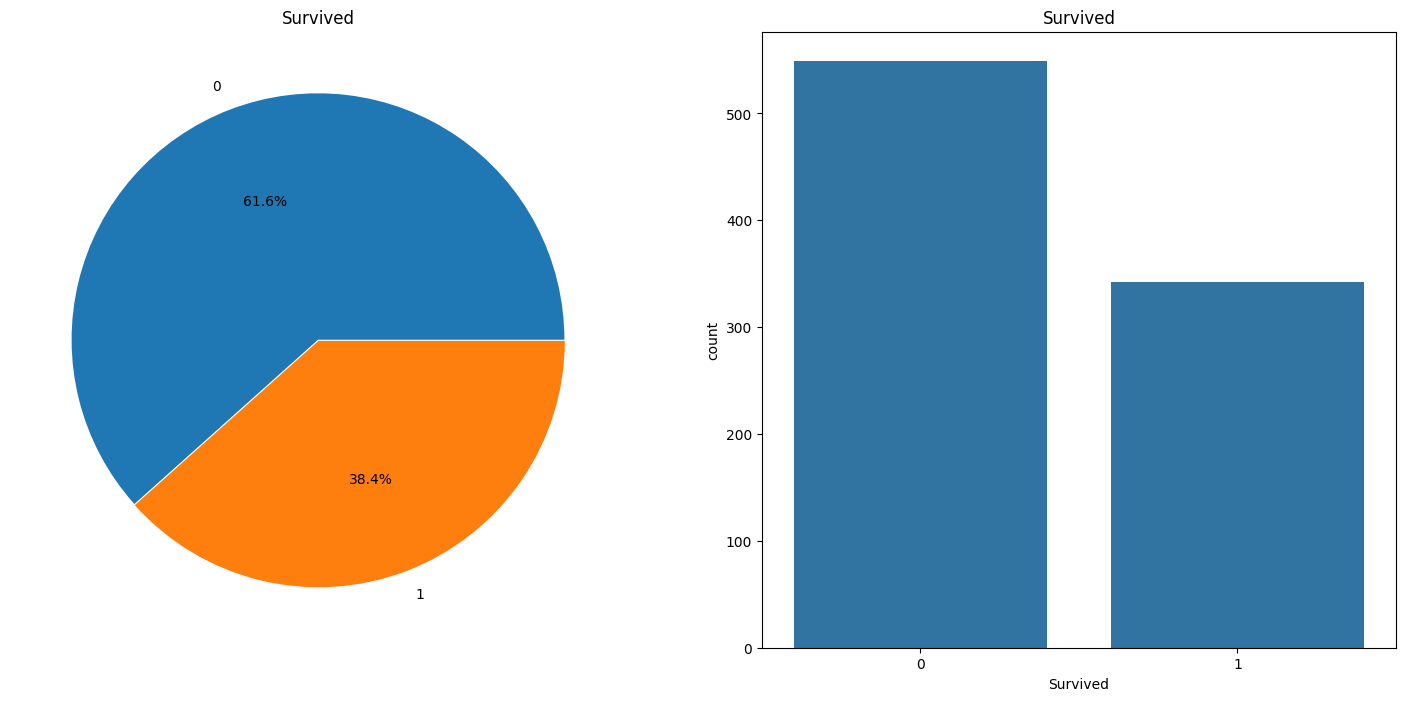

In [57]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.005],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [58]:
data.groupby(['Sex','Survived'])[['Survived']].count()

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

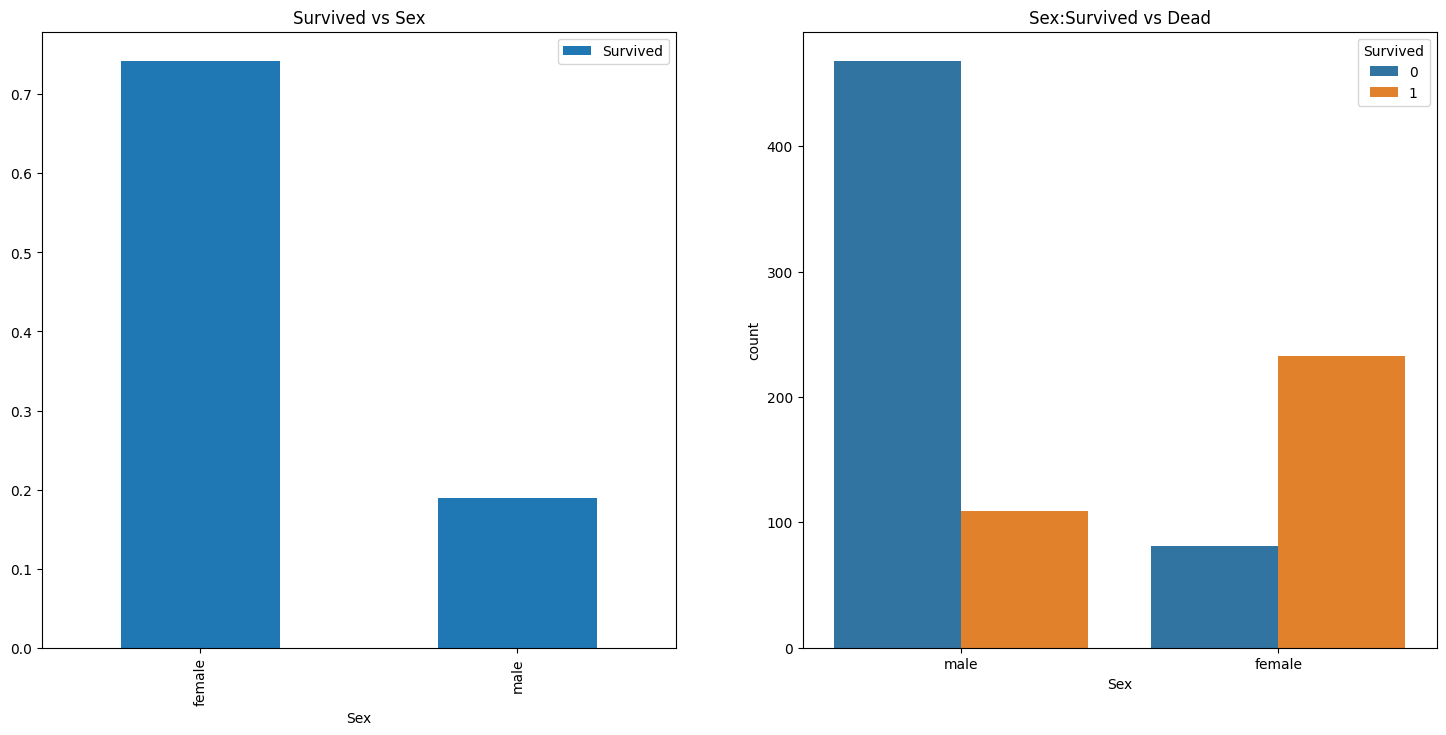

In [59]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

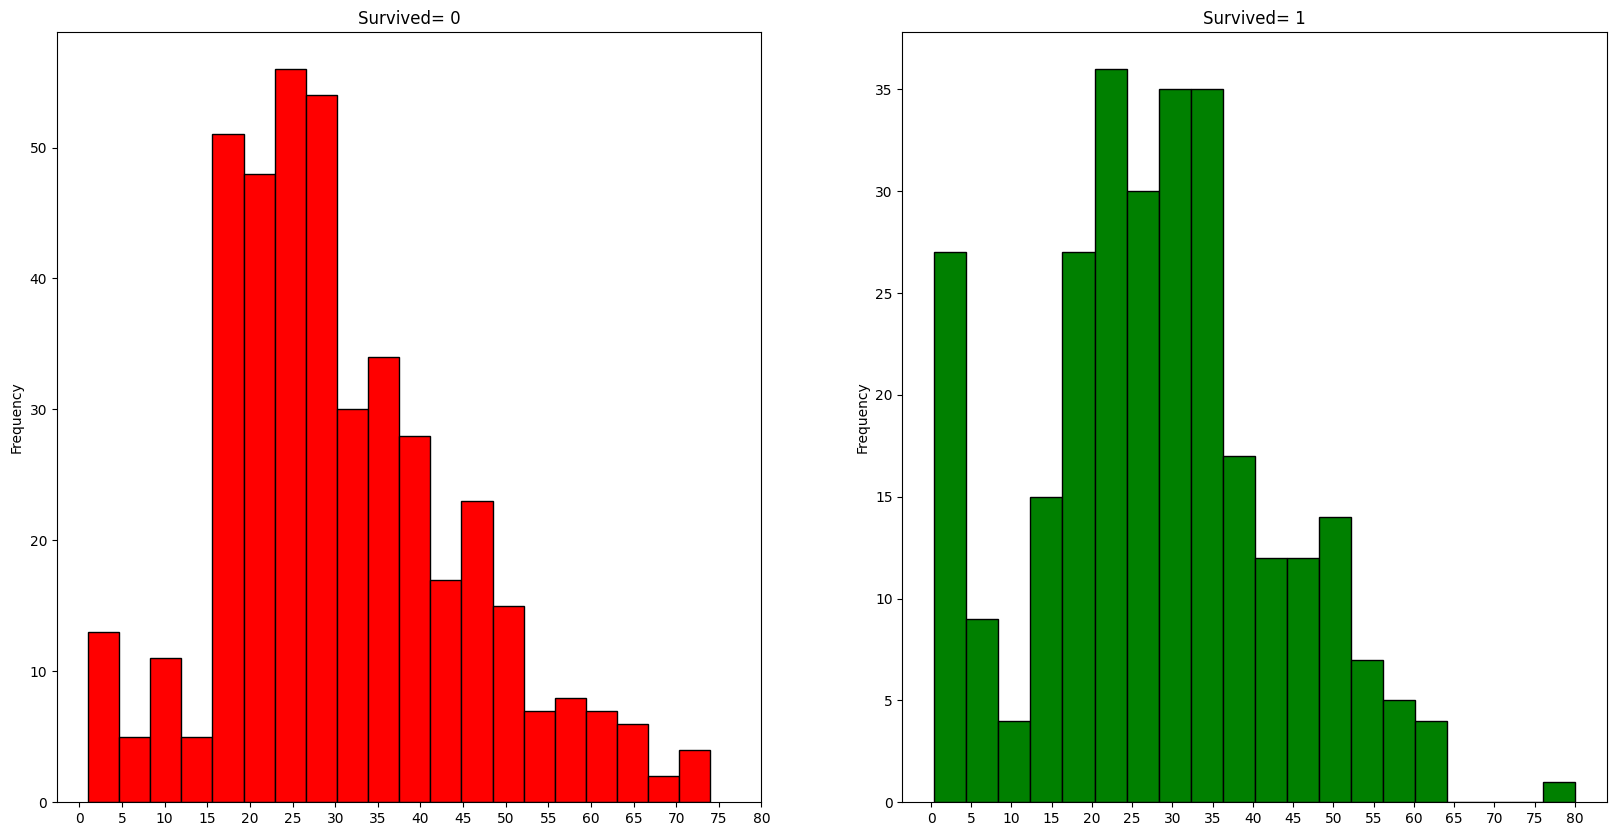

In [60]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

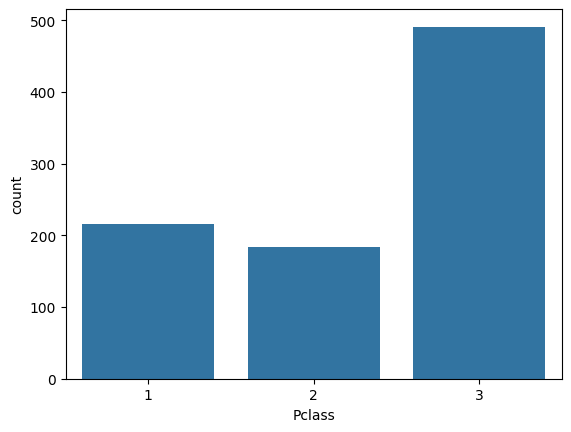

In [61]:
sns.countplot(data, x="Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

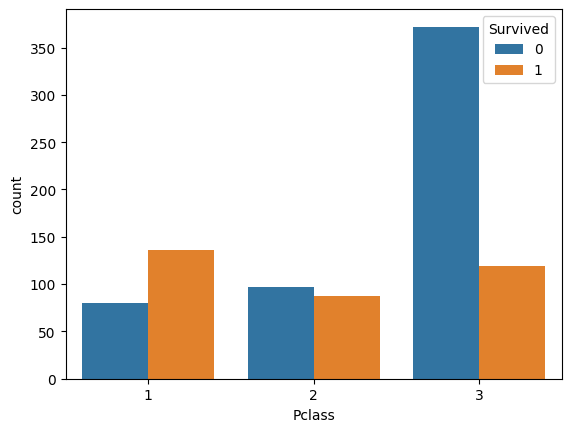

In [62]:
sns.countplot(data = data, x="Pclass", hue="Survived")

<Axes: xlabel='Pclass', ylabel='percent'>

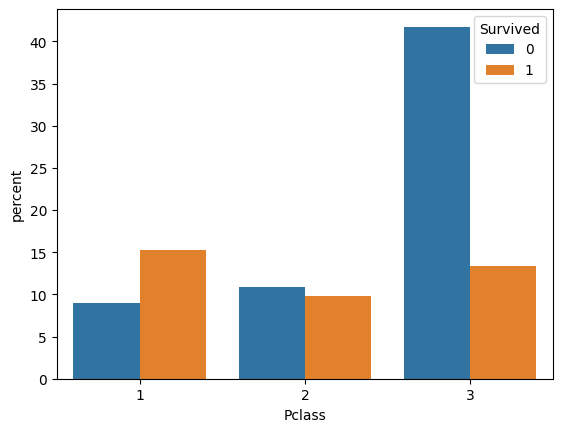

In [63]:
sns.countplot(data = data , x="Pclass", hue="Survived", stat="percent")

In [64]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# flights = sns.load_dataset("flights")
# flights.to_csv("flight2.csv", index = False)
# flights.head()

flights  = pd.read_csv("flight2.csv")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [65]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        144 non-null    int64 
 1   month       144 non-null    object
 2   passengers  144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


<Axes: xlabel='year', ylabel='passengers'>

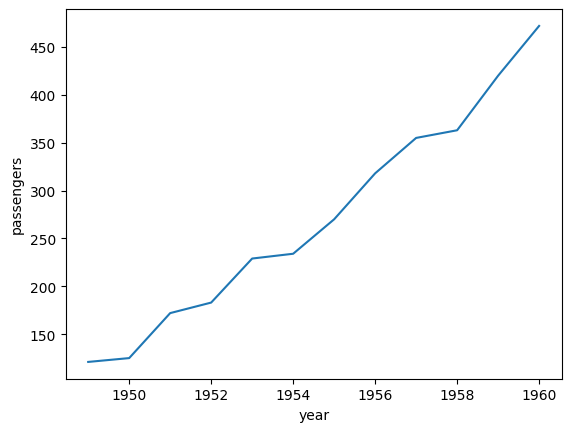

In [66]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

In [67]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237


<Axes: xlabel='year', ylabel='May'>

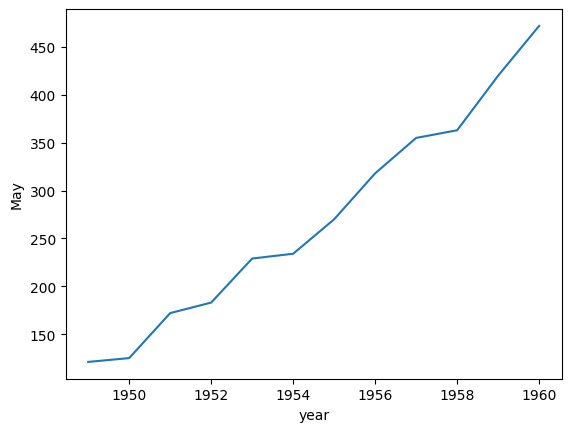

In [68]:
sns.lineplot(data=flights_wide["May"])

<Axes: xlabel='year'>

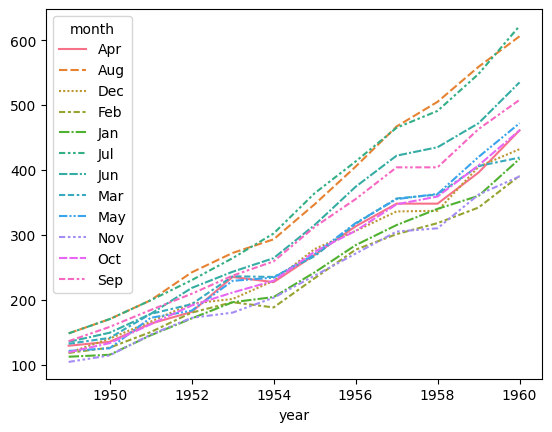

In [69]:
sns.lineplot(data=flights_wide)

<Axes: xlabel='year', ylabel='passengers'>

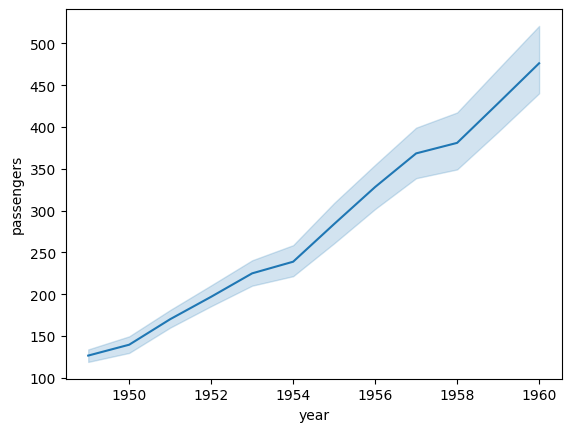

In [70]:
sns.lineplot(data=flights, x="year", y="passengers")

## Extra

In [71]:
flight2 = pd.read_csv("https://nontapatnon.github.io/python-course-master/datascience/flights.csv")

flight2

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air


In [72]:
flight2 = flight2[['month','day', 'flight']]
flight2 = flight2.groupby(['month','day']).count().reset_index()
flight2

,month,day,flight
0,1,1,842
1,1,2,943
2,1,3,914
3,1,4,915
4,1,5,720
...,...,...,...
360,12,27,963
361,12,28,814
362,12,29,888
363,12,30,968


<Axes: xlabel='year', ylabel='passengers'>

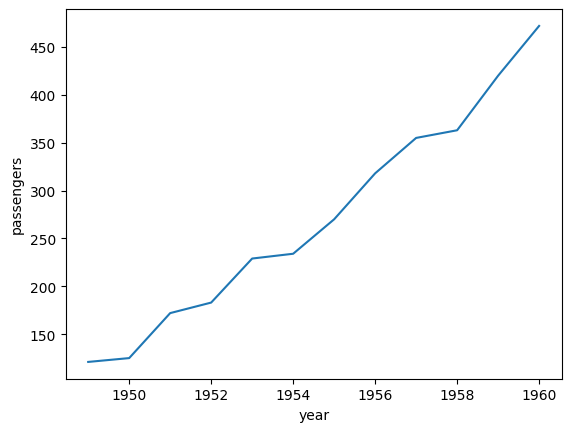

In [73]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

In [74]:
flights_wide = flight2.pivot(index="day", columns="month", values="flight")
flights_wide.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,842.0,926.0,958.0,970.0,964.0,754.0,966.0,1000.0,718.0,965.0,986.0,987.0
2,943.0,682.0,765.0,983.0,983.0,911.0,945.0,999.0,929.0,975.0,689.0,1004.0
3,914.0,814.0,913.0,992.0,978.0,982.0,983.0,809.0,956.0,995.0,902.0,973.0
4,915.0,932.0,977.0,985.0,745.0,960.0,737.0,929.0,948.0,995.0,978.0,958.0
5,720.0,896.0,965.0,981.0,912.0,970.0,822.0,1000.0,969.0,687.0,967.0,969.0


<Axes: xlabel='day', ylabel='5'>

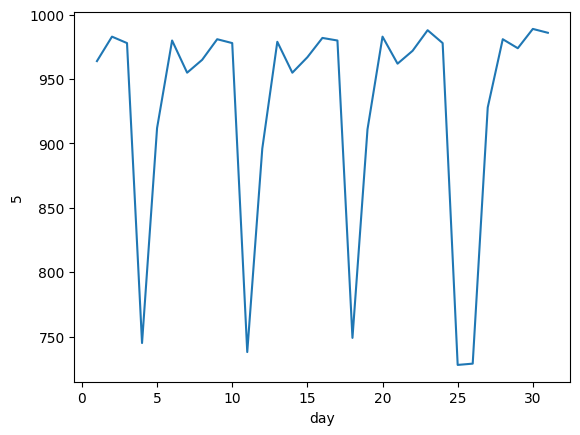

In [75]:
sns.lineplot(data=flights_wide[5])

<Axes: xlabel='day'>

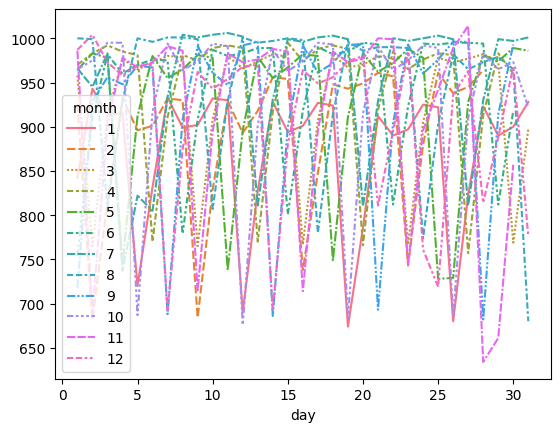

In [76]:
sns.lineplot(data=flights_wide)